# **Set up Notebook**

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


# **Load Images from Dataset**

In [ ]:
images = np.load('pathmnist.npz')

In [ ]:
x_train = images['train_images']
x_test = images['test_images']
y_train = images['train_labels']
y_test = images['test_labels']

# **EDA**

In [ ]:
x_train.shape

(89996, 28, 28, 3)

In [ ]:
#around 90k images, 28x28, 3 color channels

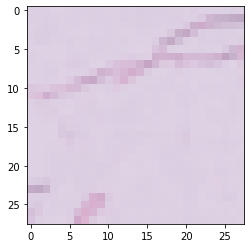

In [ ]:
plt.imshow(x_train[0])

In [ ]:
y_train.shape

(89996, 1)

In [ ]:
y_train[0]

array([0], dtype=uint8)

In [ ]:
x_train.max()

255

In [ ]:
y_train.max()

8

# **Data Preprocessing**

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
#one hot encoding
y_cat_train = to_categorical(y_train)

In [ ]:
y_cat_test = to_categorical(y_test)

In [ ]:
y_cat_train.shape

(89996, 9)

In [ ]:
y_cat_test.shape

(7180, 9)

## **Build Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, ZeroPadding2D

In [ ]:
model = Sequential()

model.add(Conv2D(input_shape=(28,28,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2), padding='same'))

model.add(Flatten())

model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))

model.add(Dense(units=9, activation="softmax"))

opt = tf.keras.optimizers.Adam(learning_rate=1e-05)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                    

# **Train Model**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=20)

In [ ]:
model.fit(x_train, y_cat_train, epochs=50, validation_data=(x_test, y_cat_test), batch_size=128, callbacks=[early_stop])

Epoch 1/50
704/704 [==============================] - 96s 121ms/step - loss: 2.0874 - accuracy: 0.1790 - val_loss: 1.5813 - val_accuracy: 0.4671
Epoch 2/50
704/704 [==============================] - 84s 119ms/step - loss: 1.4577 - accuracy: 0.4363 - val_loss: 1.2156 - val_accuracy: 0.5638
Epoch 3/50
704/704 [==============================] - 84s 119ms/step - loss: 1.2988 - accuracy: 0.4976 - val_loss: 1.1030 - val_accuracy: 0.5937
Epoch 4/50
704/704 [==============================] - 84s 120ms/step - loss: 1.2393 - accuracy: 0.5213 - val_loss: 1.0371 - val_accuracy: 0.6425
Epoch 5/50
704/704 [==============================] - 84s 119ms/step - loss: 1.1998 - accuracy: 0.5394 - val_loss: 1.0381 - val_accuracy: 0.6467
Epoch 6/50
704/704 [==============================] - 84s 119ms/step - loss: 1.1646 - accuracy: 0.5564 - val_loss: 1.2279 - val_accuracy: 0.5631
Epoch 7/50
704/704 [==============================] - 84s 119ms/step - loss: 1.1315 - accuracy: 0.5693 - val_loss: 1.0429 - val_ac

# **Evaluate Model**

In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,2.087393,0.178952,1.581312,0.467131
1,1.457685,0.436330,1.215594,0.563788
2,1.298819,0.497611,1.103042,0.593733
3,1.239283,0.521345,1.037065,0.642479
4,1.199841,0.539413,1.038083,0.646657
5,1.164626,0.556403,1.227863,0.563092
6,1.131519,0.569348,1.042920,0.631894
7,1.086400,0.582815,1.186385,0.562256
8,1.047996,0.600149,1.094375,0.626880
9,1.001039,0.617483,0.983161,0.668941


In [ ]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

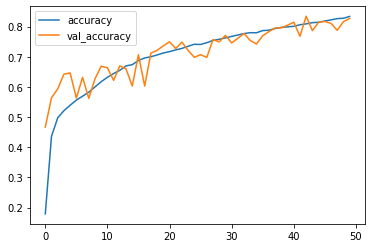

In [ ]:
metrics[['accuracy', 'val_accuracy']].plot()

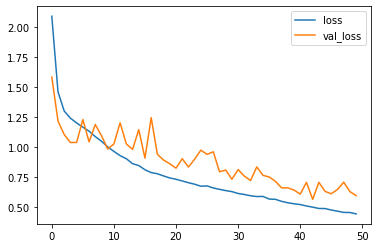

In [ ]:
metrics[['loss', 'val_loss']].plot()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)

In [ ]:
y_pred

array([8, 4, 4, ..., 4, 8, 8])

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1289
           1       1.00      0.87      0.93       971
           2       0.78      0.48      0.59       559
           3       0.88      0.86      0.87       644
           4       0.82      0.94      0.87       896
           5       0.69      0.69      0.69       594
           6       0.71      0.81      0.76       648
           7       0.37      0.62      0.46       248
           8       0.90      0.83      0.86      1331

    accuracy                           0.83      7180
   macro avg       0.78      0.78      0.78      7180
weighted avg       0.84      0.83      0.83      7180



In [ ]:
print(confusion_matrix(y_pred, y_test))

[[1231    0    0    0   49    2    1    6    0]
 [  24  847    0    0  100    0    0    0    0]
 [   3    0  266   42    2   80   23  114   29]
 [   2    0    9  555    0   58   11    2    7]
 [  14    0    0    0  844    0   25    4    9]
 [  59    0   48    0    4  407    5   68    3]
 [   5    0    0   19   19    2  527    6   70]
 [   0    0   10    0   15   43   16  155    9]
 [   0    0    6   18    2    0  133   66 1106]]
